# Exploring World Historical Battle Database
Access to this database was granted by its creator and curator, [Dr. Shuhei Kitamura of Osaka University](https://osf.io/j357k). It's important we acknowledge his generosity. 

In the interest of looking at applying data science to social studies topics, Canada's involvement in world conflict is an important part of Canadian history. This database allows us to explore battles from throughout human history, and across the world.

In [104]:
import pandas as pd
import plotly.express as px

In [105]:
# Read in the data
data = pd.read_excel('data/whbd_v11.xlsx')
data

,uid,bid,lr,bname,year,year_end,war,bell,mult_sides,win,...,lake,air,multiple,entire,unknown,ongoing,plan,nopage,wd_url,wp_url
0,1,1,l,Battle of Novšiće,1879.0,NaN,Battles for Plav and Gusinje,Principality of Montenegro,NaN,loss,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q1001069,https://en.wikipedia.org/wiki/Battle_of_Nov%C5...
1,2,1,r,Battle of Novšiće,1879.0,NaN,Battles for Plav and Gusinje,League of Prizren,NaN,win,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q1001069,https://en.wikipedia.org/wiki/Battle_of_Nov%C5...
2,3,1,r,Battle of Novšiće,1879.0,NaN,Battles for Plav and Gusinje,Ottoman Empire,NaN,win,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q1001069,https://en.wikipedia.org/wiki/Battle_of_Nov%C5...
3,4,2,l,Battle of Turckheim,1675.0,NaN,Franco-Dutch War,France,NaN,win,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q1001093,https://en.wikipedia.org/wiki/Battle_of_Turckheim
4,5,2,r,Battle of Turckheim,1675.0,NaN,Franco-Dutch War,Holy Roman Empire,NaN,loss,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q1001093,https://en.wikipedia.org/wiki/Battle_of_Turckheim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22825,22826,10126,l,NaN,1941.0,NaN,Western Desert campaign,Germany,NaN,win,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q708223,https://en.wikipedia.org/wiki/Operation_Sonnen...
22826,22827,10126,l,NaN,1941.0,NaN,Western Desert campaign,Italy,NaN,win,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q708223,https://en.wikipedia.org/wiki/Operation_Sonnen...
22827,22828,10126,r,NaN,1941.0,NaN,Western Desert campaign,United Kingdom,NaN,loss,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q708223,https://en.wikipedia.org/wiki/Operation_Sonnen...
22828,22829,10126,r,NaN,1941.0,NaN,Western Desert campaign,British Raj,NaN,loss,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q708223,https://en.wikipedia.org/wiki/Operation_Sonnen...


In [106]:
# See what the columns contain
data.columns

Index(['uid', 'bid', 'lr', 'bname', 'year', 'year_end', 'war', 'bell',
       'mult_sides', 'win', 'uk', 'fr', 'de', 'sp', 'sw', 'tr', 'at', 'ru',
       'nl', 'it', 'pt', 'dk', 'habsburg', 'hre', 'lat', 'lng', 'locn',
       'naval', 'river', 'lake', 'air', 'multiple', 'entire', 'unknown',
       'ongoing', 'plan', 'nopage', 'wd_url', 'wp_url'],
      dtype='object')

In [107]:
# Filter to only look at the battles that specify Canada as a combatant. Drop unused columns
candata = data[data['bell']=='Canada'].drop(['uk', 'fr', 'de', 'sp', 'sw', 'tr', 'at', 
                                             'ru', 'nl', 'it', 'pt', 'dk', 'habsburg', 'hre',
                                             'naval', 'river', 'lake', 'air', 'multiple', 'entire',
                                             'ongoing', 'plan', 'nopage', 'unknown'], axis=1)
display(candata)

,uid,bid,lr,bname,year,year_end,war,bell,mult_sides,win,lat,lng,locn,wd_url,wp_url
134,135,51,l,Second Battle of the Somme,1918.0,NaN,Western Front of World War I,Canada,NaN,win,49.968971,2.373859,"Somme River, France",http://www.wikidata.org/entity/Q1063735,https://en.wikipedia.org/wiki/Second_Battle_of...
242,243,92,l,Battle of the Lys,1918.0,NaN,Spring Offensive,Canada,NaN,Germans retreat,50.705556,2.900000,"Flanders, northeast France",http://www.wikidata.org/entity/Q1088364,https://en.wikipedia.org/wiki/Battle_of_the_Ly...
474,475,165,l,Battle of Messines,1917.0,NaN,Western Front of World War I,Canada,NaN,win,50.762500,2.895278,"Flanders, Belgium",http://www.wikidata.org/entity/Q1144824,https://en.wikipedia.org/wiki/Battle_of_Messin...
1007,1008,354,l,Battle of Kitcheners' Wood,1915.0,NaN,Western Front of World War I,Canada,NaN,win,50.890000,2.922000,"Ypres, Belgium",http://www.wikidata.org/entity/Q129117,https://en.wikipedia.org/wiki/Battle_of_Kitche...
1095,1096,385,l,Battle of the Somme,1916.0,NaN,Western Front of World War I,Canada,NaN,win,50.015500,2.697420,"Somme River, north-central Somme and south-eas...",http://www.wikidata.org/entity/Q132568,https://en.wikipedia.org/wiki/Battle_of_the_Somme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22599,22600,10063,l,NaN,1942.0,1945.0,World War II,Canada,NaN,win,NaN,NaN,"Coral Sea, New Guinea, Solomon Islands and Aus...",http://www.wikidata.org/entity/Q2890968,https://en.wikipedia.org/wiki/Battle_for_Austr...
22619,22620,10067,l,NaN,1945.0,NaN,World War II,Canada,NaN,NaN,NaN,NaN,Japan,http://www.wikidata.org/entity/Q300879,https://en.wikipedia.org/wiki/Operation_Downfall
22699,22700,10090,l,NaN,1944.0,1945.0,NaN,Canada,NaN,win,NaN,NaN,"Along and around the Siegfried Line, (France, ...",http://www.wikidata.org/entity/Q4872994,https://en.wikipedia.org/wiki/Battle_of_the_Rh...
22753,22754,10104,l,NaN,1944.0,NaN,World War II,Canada,NaN,win,NaN,NaN,Dutch Zeeland and northern Belgium,http://www.wikidata.org/entity/Q697022,https://en.wikipedia.org/wiki/Battle_of_the_Sc...


We can take the data and consider only the wars that list Canada as a participant:

In [108]:
list(candata['war'].sort_values().unique())

['2011 Libyan Civil War',
 'American-led intervention in Iraq (2014–present)',
 'Anbar offensive',
 'Battle of Monte Cassino',
 'Battle of Passchendaele',
 'Battle of the Scheldt',
 'Battle of the Somme',
 'Fenian raids',
 'Gulf War',
 'Hundred Days Offensive',
 'Invasion of Normandy',
 'Iraqi Civil War (2014–2017)',
 'Italian campaign',
 'Korean War',
 'Mediterranean and Middle East theatre of World War II',
 'Middle Eastern theatre of World War I',
 'Moro River Campaign',
 'Normandy landings',
 'North Russia Intervention',
 'North West Europe Campaign',
 'North-West Rebellion',
 'Northern Mali conflict',
 'Operation Overlord',
 'Pacific War',
 'Russian Civil War',
 'Second Boer War',
 'Spring Offensive',
 'War in Afghanistan',
 'Western Front of World War I',
 'World War I',
 'World War II',
 'strategic bombing during World War II',
 nan]

We can plot the battles on a map with their lattitude and longitude coordinates.

You can drag to move around the map, zoom in and out to get more clarity. Hovering over each data point lists the name of the battle, as well as the war in which the battle was fought.

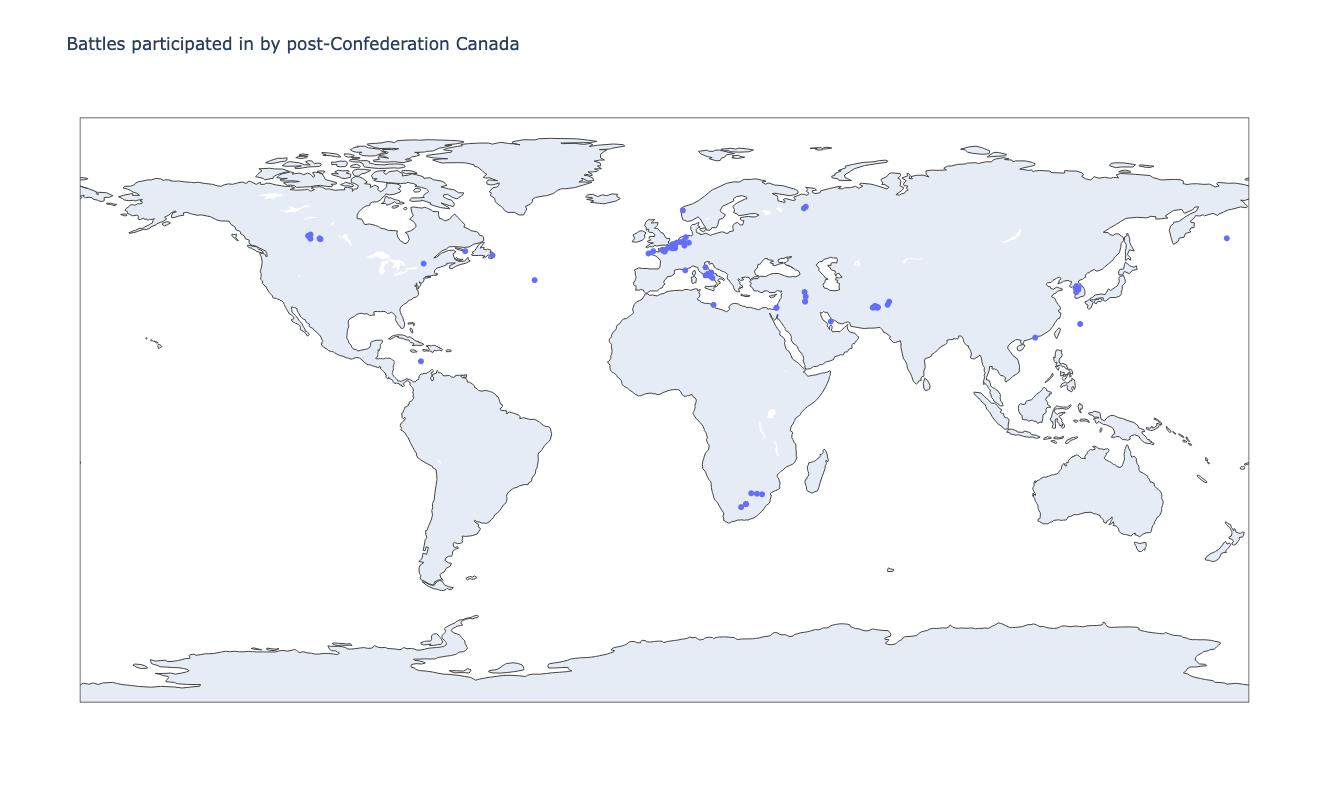

In [113]:
px.scatter_geo(candata, lat='lat', lon='lng', 
               height=800, hover_name='bname', 
               hover_data=['war', 'year'],
               title='Battles participated in by post-Confederation Canada')

But these only consider battles that happened after Confederation, as the sovereign state of Canada didn't exist yet. We can also look at battles that happened in geographic Canada by only considering lattitude and longitude values in that region:

In [114]:
# Southernmost point of Canada is Lake Erie, ON, at 41°40' N; easternmost is Cape Spear, NL, at 52°37' W
# We also need to exclude a single WWII Pacific battle that happened off the coast of Alaska that didn't involve Canada
NA_data = data[(data['lat']>41.6) & 
               (data['lng']<-52.6) & 
               (data['lng']>-160)]

# There's also many wars in this subset that don't feature Canada, so we can list them here to remove:
remove = ['American Revolutionary War',
          'Sioux Wars',
          "Red Cloud's War",
          'Dakota War of 1862',
          'Russo-Tlingit War',
          'Great Sioux War of 1876',
          'Powder River Expedition',
          'American Civil War',
          'Yellowstone Expedition of 1873',
          'Nez Perce War',
          'Comanche Campaign',
          'Boston campaign',
          'Modoc War',
          'American Revolution',
          "King Philip's War",
          'Black Hawk War',
          'Colorado War',
          'American Indian Wars',
          'Forage War',
          "Coeur d'Alene War",
          'Yakima War',
          'Philadelphia campaign',
          'Ghost Dance War']

# Remove wars listed above, as well as battles without a specific war (that all happened in the USA)
NA_data = NA_data[(~NA_data['war'].isin(remove)) & (~NA_data['war'].isnull())]
          
          
          
px.scatter_geo(NA_data, lat='lat', lon='lng', 
               height=800, hover_name='bname', 
               hover_data=['war', 'year'], 
               fitbounds='locations',
               title='Historical battles fought in present-day Canada').write_html('data/CanadaHistorical.html')

## Next Steps

Though the data can be kind of spotty for some battles, it could be interesting to bring in the number (or rate) of casualities for each battle, and size the markers proportional to that. It's only an estimate of the importance of the battle, but it's a good first step.

We could also use the plotting function to animate the conflicts throughout Canadian history.

Lastly, we could focus on WWI or WWII data and look at the advance of the Allied gains in Europe, highlighting battles that Canada was a major part of.